In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import figure, cm

# Function definition

In [2]:
H = np.array([[3,0],[0,1]])

In [3]:
def f(z):
    return (z.T).dot(H).dot(z)

def df(z):
    return H.dot(z)

f(np.array([1,1]))

4

# Plotting function

In [4]:
xmin = -2.0
xmax = 2.0
N=100

x1, x2 = np.meshgrid(np.linspace(xmin,xmax, num=N), np.linspace(xmin,xmax, num=N))
coords = np.stack([x1,x2],axis=2)
f_coords = np.apply_along_axis(f,2,coords)

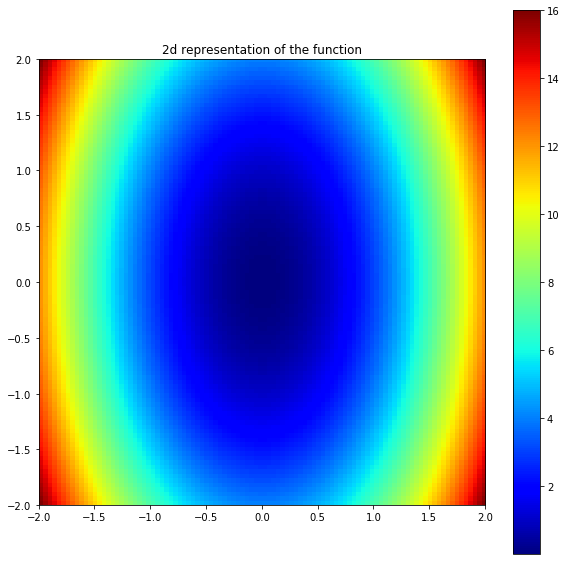

In [5]:
plt.figure(figsize=(10,10))

plt.imshow(f_coords,extent=[xmin,xmax,xmin,xmax], cmap=cm.jet, origin='lower')

plt.colorbar()

plt.title("2d representation of the function")

#plt.savefig("evaluate_2d_function_using_meshgrid_03.png", bbox_inches='tight')

plt.show()

# Classic Gradient Descent

In [6]:
def GD(alpha = 0.1,z0 = np.array([1.5,1.5]), epsilon=0.1):
    Z = [z0]
    G = [df(z0)] 
    F = [f(z0)]
    C = [len(z0)]
    
    while True: 
        zprev = Z[-1]
        gprev = G[-1]
        znext = zprev-alpha*gprev
        Z.append(znext)
        G.append(df(znext))
        F.append(f(znext))
        C.append(len(z0))
        if f(zprev)-f(znext)<epsilon: 
            break

    return (np.array(Z),C)

ZGD, C = GD(epsilon = 0.001)
print("oracle calls : ", np.sum(C))

oracle calls :  62


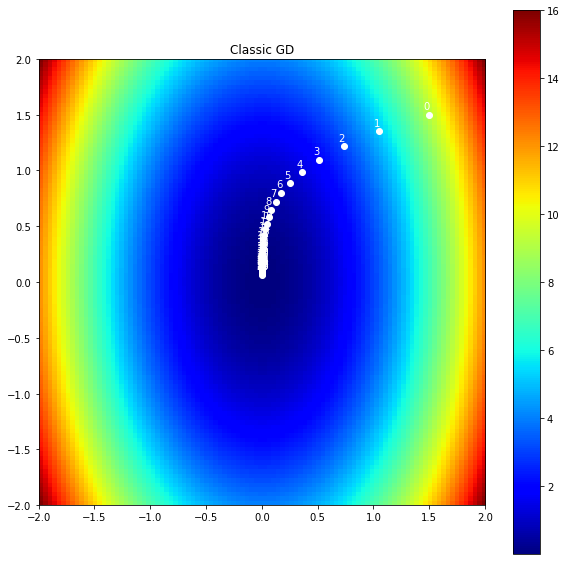

In [7]:
x=ZGD[:,0]
y=ZGD[:,1]
T = len(x)


plt.figure(figsize=(10,10))
plt.scatter(x=x,y=y,color="white")
plt.imshow(f_coords,extent=[xmin,xmax,xmin,xmax], cmap=cm.jet, origin='lower')


for i, txt in enumerate(x):
    plt.annotate(str(i), (x[i]-0.05, y[i]+0.05),color="white",fontsize=10)

plt.colorbar()


plt.title("Classic GD")

#plt.savefig("evaluate_2d_function_using_meshgrid_03.png", bbox_inches='tight')

plt.show()

Text(0.5, 1.0, 'In log scale')

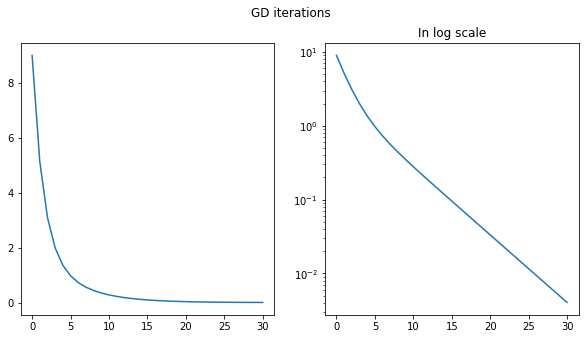

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle('GD iterations')

ax1.plot([f(ZGD[i]) for i in range(len(ZGD))])

ax2.set_title("performance")
ax2.plot([f(ZGD[i]) for i in range(len(ZGD))])
ax2.set_yscale("log")
ax2.set_title("In log scale")

In [9]:
def LRGD(alpha = 0.1,z0 = np.array([1.5,1.5]), epsilon=0.1):
    Z = [z0]
    G = [df(z0)] 
    F = [f(z0)]
    C = [len(z0)]
    flag = True
    
    while flag: 
        #start with lr version
        zprev = Z[-1]
        gprev = G[-1]
        znext = zprev-alpha*gprev #possibly lr update
        C.append(1)
        
        if f(zprev)-f(znext)<epsilon: 
            #do real GD
            gprev = df(zprev)
            G[-1] = gprev
            znext = zprev-alpha*gprev
            C[-1] = len(z0)
            if f(zprev)-f(znext)<epsilon:
                break
        
        Z.append(znext)
        gnext = df(znext).dot(gprev)/np.linalg.norm(gprev)*gprev
        G.append(gnext)
        
    return (np.array(Z),C)

In [10]:
ZLRGD,C = LRGD(epsilon=0.001)
print("oracle calls : ", np.sum(C))

oracle calls :  59


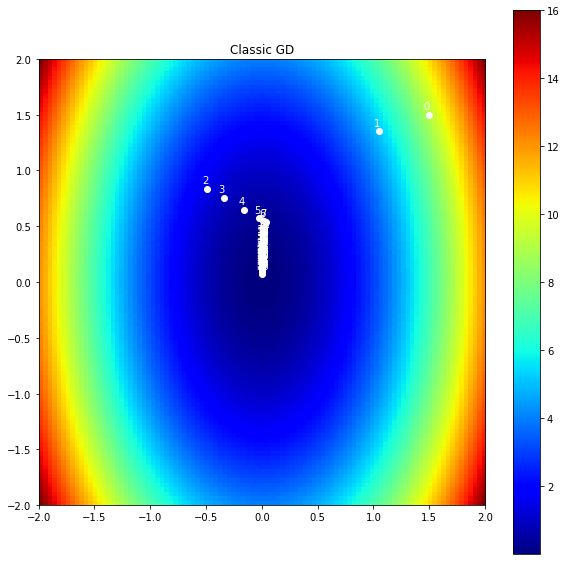

In [11]:
x=ZLRGD[:,0]
y=ZLRGD[:,1]
T = len(x)


plt.figure(figsize=(10,10))
plt.scatter(x=x,y=y,color="white")
plt.imshow(f_coords,extent=[xmin,xmax,xmin,xmax], cmap=cm.jet, origin='lower')


for i, txt in enumerate(x):
    plt.annotate(str(i), (x[i]-0.05, y[i]+0.05),color="white",fontsize=10)

plt.colorbar()


plt.title("Classic GD")

#plt.savefig("evaluate_2d_function_using_meshgrid_03.png", bbox_inches='tight')

plt.show()

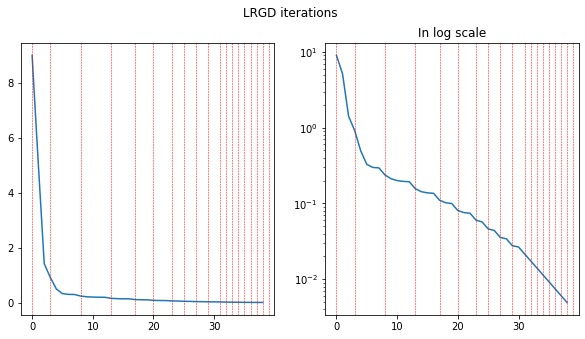

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle('LRGD iterations')

ax1.plot([f(ZLRGD[i]) for i in range(len(ZLRGD))])

ax2.set_title("performance")
ax2.plot([f(ZLRGD[i]) for i in range(len(ZLRGD))])
ax2.set_yscale("log")
ax2.set_title("In log scale")


for i,c in enumerate(C):
    if c==2: 
        ax1.axvline(x = i, color = 'r', label = 'axvline - full height', linestyle = "--", linewidth = 0.5)
        ax2.axvline(x = i, color = 'r', label = 'axvline - full height', linestyle = "--", linewidth = 0.5)
        

# Higher dimension

In [13]:
H = np.array(
    [[3,0,0,0],
     [0,1,0,0],
     [0,0,0.1,0],
     [0,0,0,0.01]])

In [19]:
ZGD,C = GD(z0 = np.array([1,1,1,1]),epsilon=0.001)
print("oracle calls : ", np.sum(C))

oracle calls :  164


In [20]:
ZLRGD,C = LRGD(z0 = np.array([1,1,1,1]),epsilon=0.001)
print("oracle calls : ", np.sum(C))

oracle calls :  156


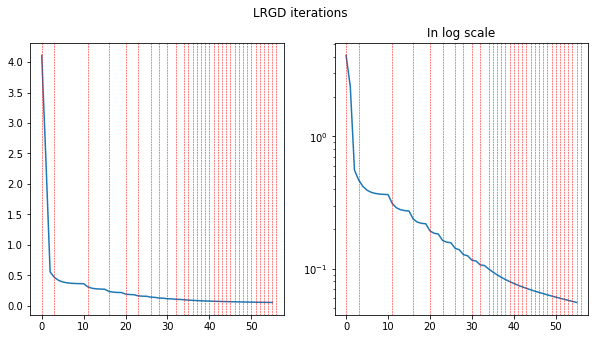

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle('LRGD iterations')

ax1.plot([f(ZLRGD[i]) for i in range(len(ZLRGD))])

ax2.set_title("performance")
ax2.plot([f(ZLRGD[i]) for i in range(len(ZLRGD))])
ax2.set_yscale("log")
ax2.set_title("In log scale")


for i,c in enumerate(C):
    if c>1: 
        ax1.axvline(x = i, color = 'r', label = 'axvline - full height', linestyle = "--", linewidth = 0.5)
        ax2.axvline(x = i, color = 'r', label = 'axvline - full height', linestyle = "--", linewidth = 0.5)
        